In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
xls = pd.ExcelFile("Case_Study_Urgency_Message_Data.xlsx")

dfs = []

for sheet_name in xls.sheet_names:
    d = pd.read_excel(xls, sheet_name)
    dfs.append(d)
x = pd.concat(dfs, ignore_index=True)

In [4]:
df=x.copy()

In [5]:
df.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date
0,1,71.06,297388,9395,2.50,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
1,2,76.56,298322,9395,3.00,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
2,3,153.88,2313076,9395,5.00,Hotel,chain,2016-08-02,2016-10-01,2016-10-02
3,4,126.60,2240838,9395,3.50,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03
4,5,115.08,2240838,9395,3.50,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03


In [6]:
df.shape

(49064, 10)

In [7]:
df.columns

Index(['#', 'ADR_USD', 'hotel_id', 'city_id', 'star_rating',
       'accommadation_type_name', 'chain_hotel', 'booking_date',
       'checkin_date', 'checkout_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49064 entries, 0 to 49063
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   #                        49064 non-null  int64         
 1   ADR_USD                  49064 non-null  float64       
 2   hotel_id                 49064 non-null  int64         
 3   city_id                  49064 non-null  int64         
 4   star_rating              49064 non-null  float64       
 5   accommadation_type_name  49064 non-null  object        
 6   chain_hotel              49064 non-null  object        
 7   booking_date             49064 non-null  datetime64[ns]
 8   checkin_date             49064 non-null  datetime64[ns]
 9   checkout_date            49064 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [9]:
df.isnull().sum()

#                          0
ADR_USD                    0
hotel_id                   0
city_id                    0
star_rating                0
accommadation_type_name    0
chain_hotel                0
booking_date               0
checkin_date               0
checkout_date              0
dtype: int64

In [10]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O'), dtype('<M8[ns]')],
      dtype=object)

In [11]:
print("\n".join(["Columns with {} data type: {}".format(dtype, df.select_dtypes(include=[dtype]).columns.tolist()) for dtype in df.dtypes.unique()]))

Columns with int64 data type: ['#', 'hotel_id', 'city_id']
Columns with float64 data type: ['ADR_USD', 'star_rating']
Columns with object data type: ['accommadation_type_name', 'chain_hotel']
Columns with datetime64[ns] data type: ['booking_date', 'checkin_date', 'checkout_date']


In [12]:
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['checkin_date'] = pd.to_datetime(df['checkin_date'])
df['checkout_date'] = pd.to_datetime(df['checkout_date'])

In [13]:
df.describe(include='O')

,accommadation_type_name,chain_hotel
count,49064,49064
unique,16,2
top,Hotel,non-chain
freq,35441,35827


In [14]:
df['accommadation_type_name'] = df['accommadation_type_name'].astype('category')

In [15]:
df['chain_hotel'] = df['chain_hotel'].astype('category')

In [16]:
df['hotel_id'] = df['hotel_id'].astype('category')
df['city_id'] = df['city_id'].astype('category')

In [17]:
df.head(3)

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date
0,1,71.06,297388,9395,2.50,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
1,2,76.56,298322,9395,3.00,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
2,3,153.88,2313076,9395,5.00,Hotel,chain,2016-08-02,2016-10-01,2016-10-02


### Data Encoding for Categorical Variables

The provided code block is essential for encoding categorical variables within the dataset. This step is crucial in data analysis for several reasons:

1. **One-Hot Encoding**: The use of `pd.get_dummies()` enables the transformation of categorical variables, such as 'accommodation_type_name', into a series of binary indicator variables. This technique is particularly valuable when dealing with categorical data that lacks ordinality or hierarchy. By creating separate binary columns for each category, it ensures that the model does not impose any false ordering on the data.

2. **Binary Encoding**: The 'chain_hotel' column is encoded using a binary mapping, with 'non-chain' mapped to 0 and 'chain' to 1. This binary encoding simplifies the representation of binary categorical variables, such as the distinction between chain and non-chain hotels. It provides a concise numerical representation that is easily interpretable and suitable for modeling purposes.

3. **Label Encoding**: The use of `LabelEncoder()` on the 'hotel_id' and 'city_id' columns converts categorical values into numerical labels. This conversion is particularly useful when dealing with categorical variables with a large number of unique categories. Label encoding assigns a unique numerical label to each category, facilitating numerical analysis and modeling without introducing the dimensionality issues associated with one-hot encoding.

By encoding categorical variables in this manner, the analysis ensures that the data is prepared appropriately for subsequent analysis and modeling tasks. It enables the incorporation of categorical information into statistical models and algorithms, thereby enhancing the overall robustness and effectiveness of the analysis process.


In [18]:
accommodation_type_encoded = pd.get_dummies(df['accommadation_type_name'], prefix='accommodation_type')
df['chain_hotel_encoded'] = df['chain_hotel'].map({'non-chain': 0, 'chain': 1})
df = pd.concat([df, accommodation_type_encoded], axis=1)
label_encoder = LabelEncoder()
df['hotel_id_encoded'] = label_encoder.fit_transform(df['hotel_id'])
df['city_id_encoded'] = label_encoder.fit_transform(df['city_id'])

### Visualization of All Columns and it's Distribution

To visualize the distribution of columns within the dataset. This visualization serves several purposes within the analysis:

1. **Visual Representation**: 
2. **Insight Generation**: .

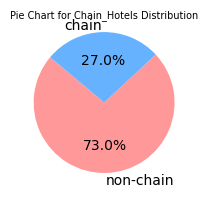

In [19]:
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
plt.figure(figsize=(2, 2))
plt.pie(df['chain_hotel'].value_counts(), labels=df['chain_hotel'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Pie Chart for Chain_Hotels Distribution', fontsize=7)
plt.axis('equal')
plt.show()

C:\Users\gcv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='chain_hotel', ylabel='ADR_USD'>

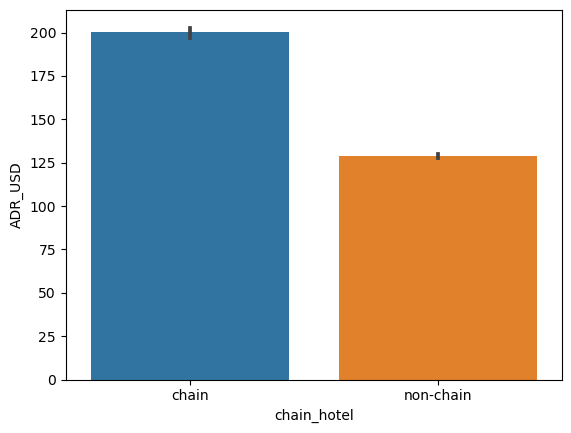

In [20]:
sns.barplot(x='chain_hotel', y='ADR_USD', data=df)

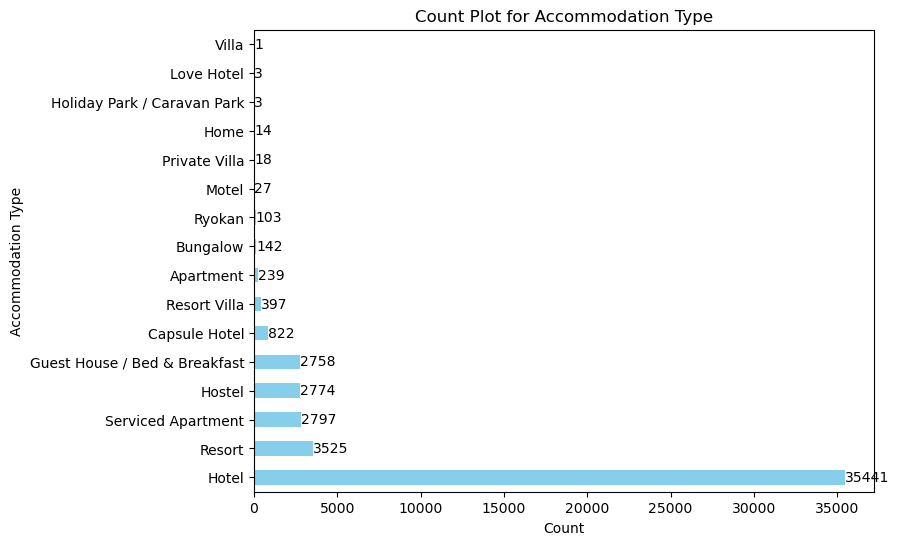

In [21]:
plt.figure(figsize=(8, 6))
df['accommadation_type_name'].value_counts().plot(kind='barh', color='skyblue')

for i, count in enumerate(df['accommadation_type_name'].value_counts()):
    plt.text(count, i, str(count), ha='left', va='center')
    
plt.xlabel('Count')
plt.ylabel('Accommodation Type')
plt.title('Count Plot for Accommodation Type')

plt.show()


In [22]:
df.value_counts("hotel_id")

hotel_id
197996     2679
21272      1314
219762     1284
16146      1141
1545890    1038
           ... 
2240552       1
593004        1
373728        1
2294692       1
5211366       1
Name: count, Length: 880, dtype: int64

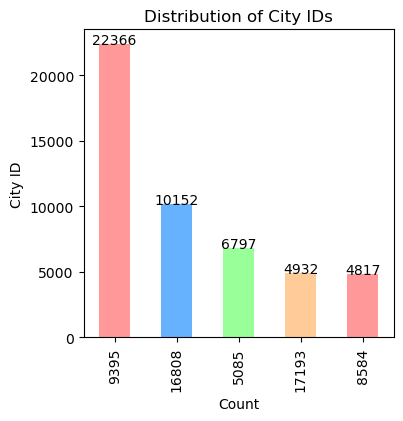

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

ax = df['city_id'].value_counts().plot(kind='bar', color=colors)

for i, count in enumerate(df['city_id'].value_counts()):
    ax.text(i, count + 0.2, str(count), ha='center')

plt.xlabel('Count')
plt.ylabel('City ID')
plt.title('Distribution of City IDs')

plt.show()


In [24]:
df['hotel_id'].value_counts().head(20)

hotel_id
197996     2679
21272      1314
219762     1284
16146      1141
1545890    1038
297388      865
1251372     864
1093720     773
11198       732
866630      697
373272      592
782884      567
21720       548
1861318     512
15440       490
561636      487
181544      462
363664      448
16358       445
510678      440
Name: count, dtype: int64

In [25]:
df.columns

Index(['#', 'ADR_USD', 'hotel_id', 'city_id', 'star_rating',
       'accommadation_type_name', 'chain_hotel', 'booking_date',
       'checkin_date', 'checkout_date', 'chain_hotel_encoded',
       'accommodation_type_Apartment', 'accommodation_type_Bungalow',
       'accommodation_type_Capsule Hotel',
       'accommodation_type_Guest House / Bed & Breakfast',
       'accommodation_type_Holiday Park / Caravan Park',
       'accommodation_type_Home', 'accommodation_type_Hostel',
       'accommodation_type_Hotel', 'accommodation_type_Love Hotel',
       'accommodation_type_Motel', 'accommodation_type_Private Villa',
       'accommodation_type_Resort', 'accommodation_type_Resort Villa',
       'accommodation_type_Ryokan', 'accommodation_type_Serviced Apartment',
       'accommodation_type_Villa', 'hotel_id_encoded', 'city_id_encoded'],
      dtype='object')

### Cross-Tabulation and Chi-Square Test for Categorical Variables

The provided code block conducts cross-tabulation and chi-square tests for pairs of categorical variables within the dataset. This process serves several important purposes in the analysis:

1. **Exploring Relationships**: Cross-tabulation allows for the examination of relationships between pairs of categorical variables. By tabulating the frequency counts of observations within each combination of categories, it provides insights into potential associations or dependencies.

2. **Statistical Significance**: The chi-square test assesses the statistical significance of observed relationships in the cross-tabulated data. It evaluates whether the observed frequency counts deviate significantly from what would be expected under the null hypothesis of independence between the variables.

3. **Interpretation of Results**: The output includes the cross-tabulation tables and the results of the chi-square test, including the chi-square statistic and associated p-value. These values are crucial for interpreting the strength and significance of the observed relationships between categorical variables.

4. **Identification of Dependencies**: Significant p-values indicate that there is evidence to reject the null hypothesis of independence between the variables. This suggests that there may be dependencies or associations between the categorical variables, which can inform further analysis or modeling decisions.

By conducting cross-tabulation and chi-square tests for pairs of categorical variables, the analysis gains valuable insights into the relationships and dependencies within the dataset, aiding in the identification of relevant patterns and trends.

In [26]:
import pandas as pd

categorical_columns = ['city_id', 'accommadation_type_name', 'chain_hotel']

for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        cross_tab = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
        
        print(f"Cross-Tabulation between {categorical_columns[i]} and {categorical_columns[j]}:")
        print(cross_tab)
        print("\nChi-Square Test:")
        print(f"Chi2 value: {chi2}")
        print(f"P-value: {p}")
        print("\n")

Cross-Tabulation between city_id and accommadation_type_name:
accommadation_type_name  Apartment  Bungalow  Capsule Hotel  \
city_id                                                       
5085                           137         0            822   
8584                            17         1              0   
9395                            51         0              0   
16808                            0         0              0   
17193                           34       141              0   

accommadation_type_name  Guest House / Bed & Breakfast  \
city_id                                                  
5085                                               374   
8584                                               341   
9395                                               520   
16808                                              991   
17193                                              532   

accommadation_type_name  Holiday Park / Caravan Park  Home  Hostel  Hotel  \
city_id     

### Cross-Tabulation Analysis

The provided cross-tabulation tables show the distribution of accommodation types and chain hotel status across different cities, as well as the distribution of chain hotel status within each accommodation type. Here's a summary of the analysis:

#### Cross-Tabulation between City and Accommodation Type:
- **Chi-Square Test**:
  - The chi-square test statistic is 28063.87 with a p-value of 0.0.
  - This indicates a significant association between city and accommodation type.
- **Interpretation**:
  - The table shows the count of each accommodation type within different cities.
  - The significant chi-square value suggests that the distribution of accommodation types varies significantly across cities.

#### Cross-Tabulation between City and Chain Hotel Status:
- **Chi-Square Test**:
  - The chi-square test statistic is 1629.04 with a p-value of 0.0.
  - This indicates a significant association between city and chain hotel status.
- **Interpretation**:
  - The table presents the count of chain and non-chain hotels within different cities.
  - The significant chi-square value suggests that the distribution of chain hotel status differs significantly across cities.

#### Cross-Tabulation between Accommodation Type and Chain Hotel Status:
- **Chi-Square Test**:
  - The chi-square test statistic is 3775.66 with a p-value of 0.0.
  - This indicates a significant association between accommodation type and chain hotel status.
- **Interpretation**:
  - The table displays the count of chain and non-chain hotels within each accommodation type.
  - The significant chi-square value suggests that the distribution of chain hotel status varies significantly across different accommodation types.

These cross-tabulation analyses provide insights into the relationships between city, accommodation type, and chain hotel status, highlighting significant associations that can inform strategic decisions related to hotel management, marketing, and customer targeting.


In [27]:
df.select_dtypes(include='datetime').describe()

,booking_date,checkin_date,checkout_date
count,49064,49064,49064
mean,2016-11-01 22:25:33.213761536,2016-11-16 11:07:59.569541888,2016-11-18 03:21:50.158160896
min,2016-08-02 00:00:00,2016-10-01 00:00:00,2016-10-02 00:00:00
25%,2016-10-10 00:00:00,2016-10-23 00:00:00,2016-10-25 00:00:00
50%,2016-11-02 00:00:00,2016-11-17 00:00:00,2016-11-19 00:00:00
75%,2016-11-26 00:00:00,2016-12-10 00:00:00,2016-12-12 00:00:00
max,2016-12-31 00:00:00,2016-12-31 00:00:00,2017-01-03 00:00:00


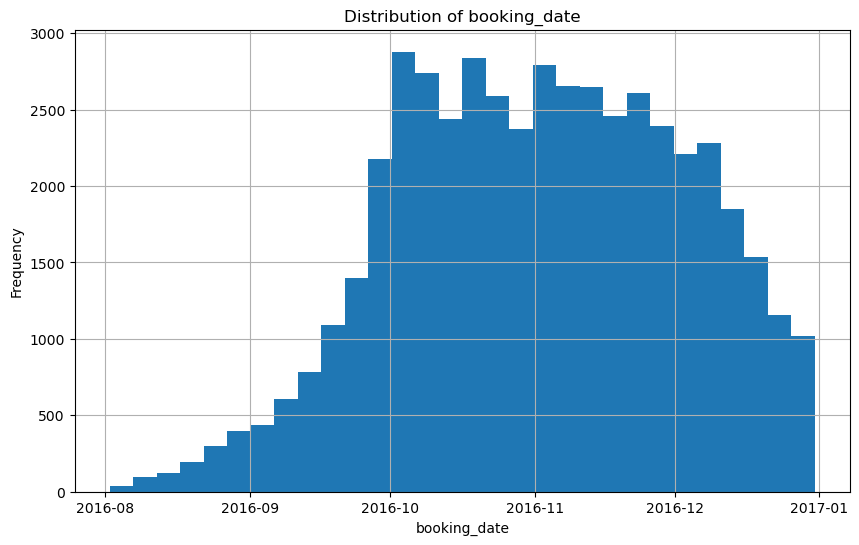

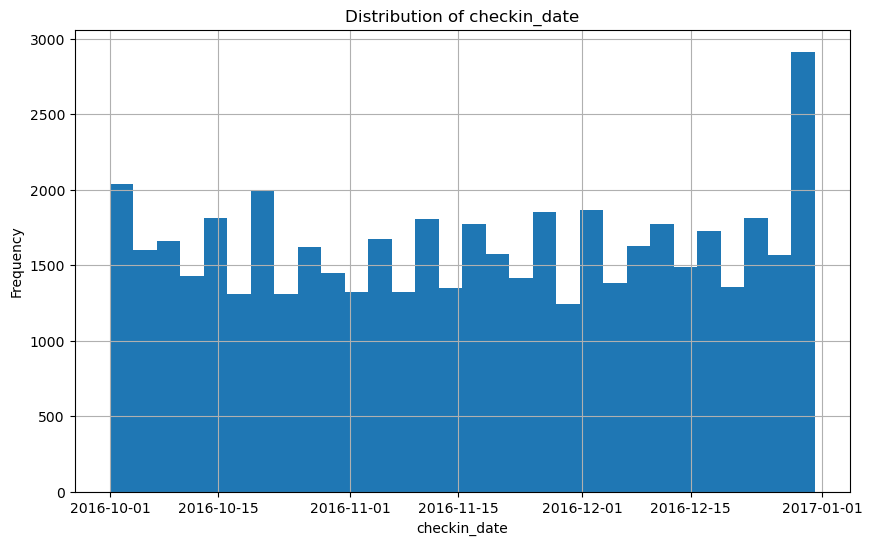

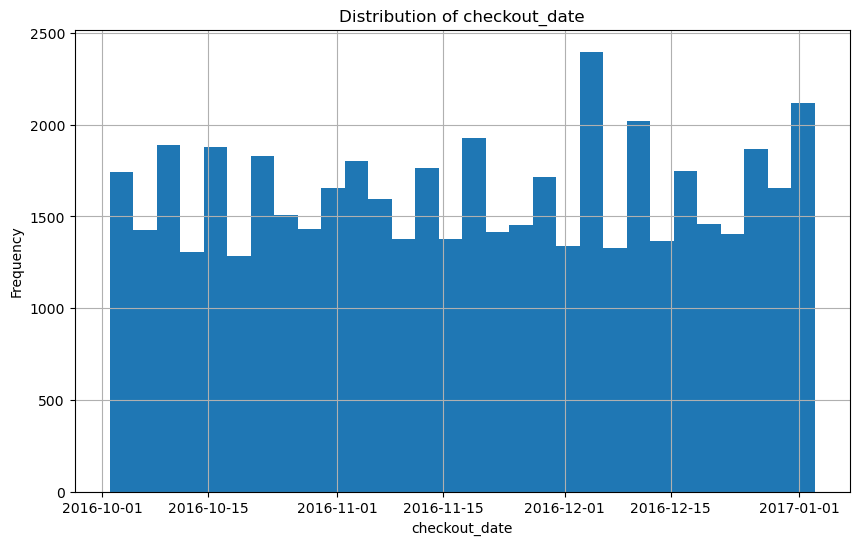

In [28]:
for col in df.select_dtypes(include='datetime'):
    plt.figure(figsize=(10, 6))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [29]:
df.describe(include='datetime64[ns]')

,booking_date,checkin_date,checkout_date
count,49064,49064,49064
mean,2016-11-01 22:25:33.213761536,2016-11-16 11:07:59.569541888,2016-11-18 03:21:50.158160896
min,2016-08-02 00:00:00,2016-10-01 00:00:00,2016-10-02 00:00:00
25%,2016-10-10 00:00:00,2016-10-23 00:00:00,2016-10-25 00:00:00
50%,2016-11-02 00:00:00,2016-11-17 00:00:00,2016-11-19 00:00:00
75%,2016-11-26 00:00:00,2016-12-10 00:00:00,2016-12-12 00:00:00
max,2016-12-31 00:00:00,2016-12-31 00:00:00,2017-01-03 00:00:00


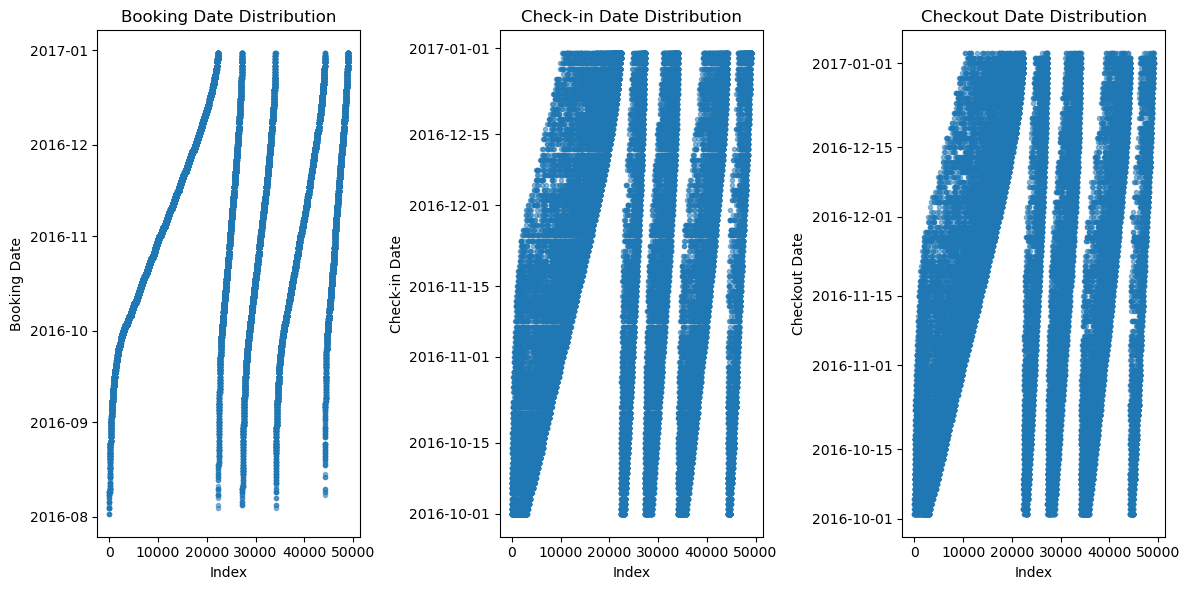

In [30]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(df.index, df['booking_date'], marker='.', alpha=0.5)
plt.title('Booking Date Distribution')
plt.xlabel('Index')
plt.ylabel('Booking Date')

plt.subplot(1, 3, 2)
plt.scatter(df.index, df['checkin_date'], marker='.', alpha=0.5)
plt.title('Check-in Date Distribution')
plt.xlabel('Index')
plt.ylabel('Check-in Date')

plt.subplot(1, 3, 3)
plt.scatter(df.index, df['checkout_date'], marker='.', alpha=0.5)
plt.title('Checkout Date Distribution')
plt.xlabel('Index')
plt.ylabel('Checkout Date')

plt.tight_layout()
plt.show()


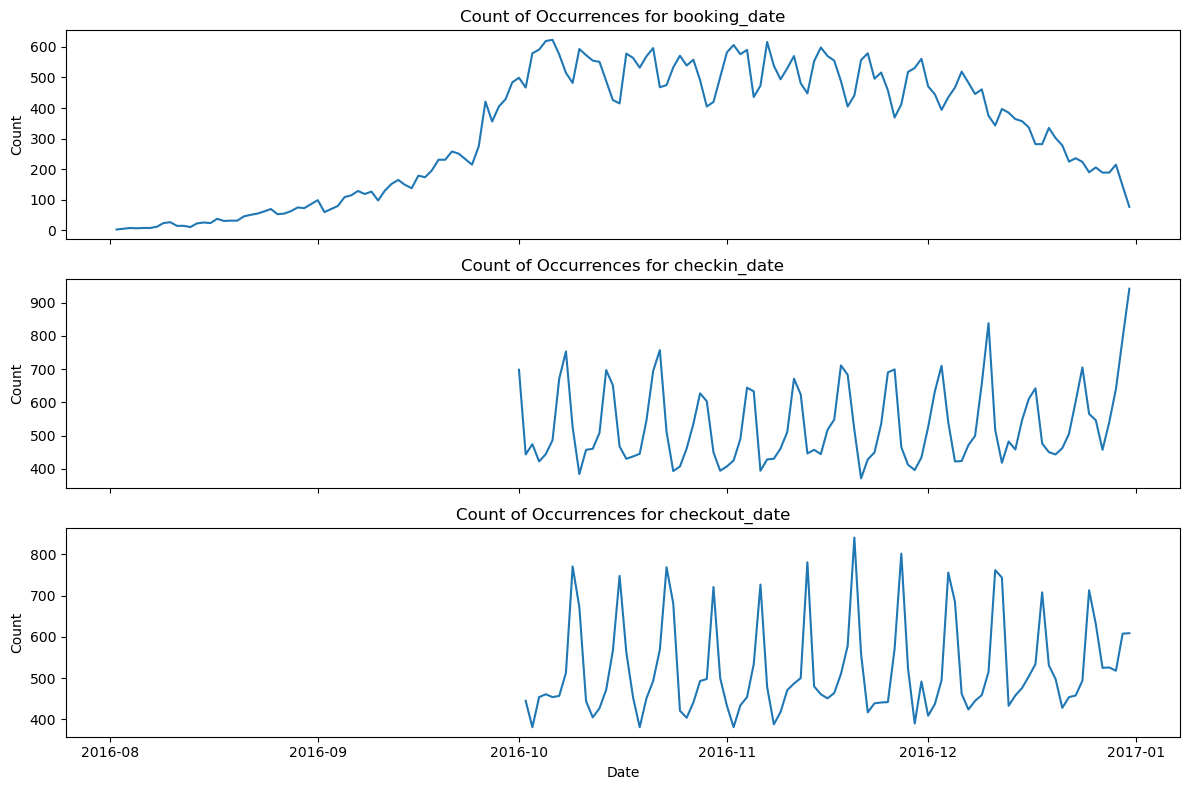

In [31]:
datetime_columns = ['booking_date', 'checkin_date', 'checkout_date']

for column in datetime_columns:
    df[column + '_date'] = df[column].dt.date

date_counts = pd.DataFrame()
for column in datetime_columns:
    date_counts[column] = df.groupby(column + '_date').size()

fig, axes = plt.subplots(len(datetime_columns), 1, figsize=(12, 8), sharex=True)

for i, column in enumerate(datetime_columns):
    ax = axes[i]
    ax.plot(date_counts.index, date_counts[column])
    ax.set_title(f'Count of Occurrences for {column}')
    ax.set_ylabel('Count')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [32]:
df.select_dtypes(include='float').corr()

,ADR_USD,star_rating
ADR_USD,1.00,0.36
star_rating,0.36,1.00


### Correlation Analysis: Average Daily Rate (ADR) and Star Rating

The correlation matrix indicates the correlation coefficients between average daily rate (ADR) and star rating. Here's a summary of the correlation analysis:

- **Correlation Coefficients**:
  - ADR_USD vs. Star Rating: 0.36
    - This positive correlation coefficient suggests a moderate, positive relationship between average daily rate (ADR) and star rating.
    - A value of 0.36 indicates that there is a moderate linear association between ADR and star rating.
    - As star rating increases, there tends to be a moderate increase in ADR, and vice versa.

This correlation analysis provides insights into the relationship between ADR and star rating, indicating a moderate positive association between these two variables. Understanding this relationship can help stakeholders make informed decisions related to pricing strategies, quality perception, and customer satisfaction.


C:\Users\gcv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


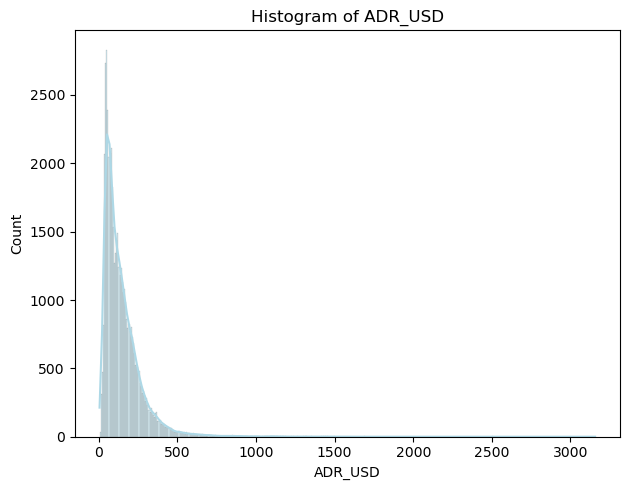

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['ADR_USD'], kde=True, color='lightblue')
plt.title('Histogram of ADR_USD')
plt.tight_layout()
plt.show()

In [34]:
n, bins = np.histogram(df["ADR_USD"], bins=10, density=True)

percentages = n / np.sum(n) * 100

bin_table = pd.DataFrame({
    'Bin Range': [f'{bins[i]:.2f} - {bins[i+1]:.2f}' for i in range(len(bins) - 1)],
    'Percentage': percentages
})

bin_table

,Bin Range,Percentage
0,4.26 - 319.52,92.60
1,319.52 - 634.78,6.38
2,634.78 - 950.04,0.68
3,950.04 - 1265.30,0.19
4,1265.30 - 1580.56,0.09
5,1580.56 - 1895.82,0.02
6,1895.82 - 2211.08,0.01
7,2211.08 - 2526.34,0.02
8,2526.34 - 2841.60,0.00
9,2841.60 - 3156.86,0.00


We can see that more than 92% of the population of our data set is between 4.26 - 319.52 bracket of ADR. It may be possible that rest are the outliers.

In [35]:
shapiro_ADR = stats.shapiro(df['ADR_USD'])
print("Shapiro-Wilk test p-value for ADR_USD:", shapiro_ADR.pvalue)

shapiro_star_rating = stats.shapiro(df['star_rating'])
print("Shapiro-Wilk test p-value for star_rating:", shapiro_star_rating.pvalue)


Shapiro-Wilk test p-value for ADR_USD: 0.0
Shapiro-Wilk test p-value for star_rating: 0.0


C:\Users\gcv\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Shapiro-Wilk Test for Normality

The Shapiro-Wilk test assesses whether a given sample of data follows a normal distribution. Here are the results of the Shapiro-Wilk tests conducted for the variables ADR_USD (average daily rate) and star_rating:

- **Shapiro-Wilk Test p-values**:
  - ADR_USD: 0.0
  - Star Rating: 0.0
- **Interpretation**:
  - A Shapiro-Wilk test p-value less than 0.05 indicates that the null hypothesis of normality is rejected, suggesting that the data significantly deviates from a normal distribution.
  - Both ADR_USD and star_rating have Shapiro-Wilk test p-values of 0.0, indicating that they do not follow a normal distribution.

These results imply that the distributions of ADR_USD and star_rating are significantly different from normal distributions. It's important to consider this non-normality when conducting further statistical analyses and interpreting the results.


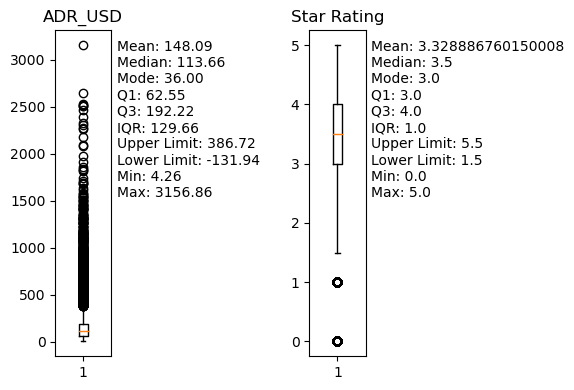

In [36]:
adr_stats = {
    'Mean': df['ADR_USD'].mean(),
    'Median': df['ADR_USD'].median(),
    'Mode': df['ADR_USD'].mode()[0],
    'Q1': np.percentile(df['ADR_USD'], 25),
    'Q3': np.percentile(df['ADR_USD'], 75),
    'IQR': np.percentile(df['ADR_USD'], 75) - np.percentile(df['ADR_USD'], 25),
    'Upper Limit': np.percentile(df['ADR_USD'], 75) + 1.5 * (np.percentile(df['ADR_USD'], 75) - np.percentile(df['ADR_USD'], 25)),
    'Lower Limit': np.percentile(df['ADR_USD'], 25) - 1.5 * (np.percentile(df['ADR_USD'], 75) - np.percentile(df['ADR_USD'], 25)),
    'Min': df['ADR_USD'].min(),
    'Max': df['ADR_USD'].max()
}

star_rating_stats = {
    'Mean': df['star_rating'].mean(),
    'Median': df['star_rating'].median(),
    'Mode': df['star_rating'].mode()[0],
    'Q1': np.percentile(df['star_rating'], 25),
    'Q3': np.percentile(df['star_rating'], 75),
    'IQR': np.percentile(df['star_rating'], 75) - np.percentile(df['star_rating'], 25),
    'Upper Limit': np.percentile(df['star_rating'], 75) + 1.5 * (np.percentile(df['star_rating'], 75) - np.percentile(df['star_rating'], 25)),
    'Lower Limit': np.percentile(df['star_rating'], 25) - 1.5 * (np.percentile(df['star_rating'], 75) - np.percentile(df['star_rating'], 25)),
    'Min': df['star_rating'].min(),
    'Max': df['star_rating'].max()
}


fig, axs = plt.subplots(1, 2, figsize=(6, 4))

axs[0].boxplot(df['ADR_USD'])
spacing = 0.05
for i, (stat, value) in enumerate(adr_stats.items()):
    axs[0].text(1.1, 0.95 - i*spacing, f'{stat}: {value:.2f}', va='center', transform=axs[0].transAxes)
axs[0].set_title('ADR_USD')


axs[1].boxplot(df['star_rating'])
for i, (stat, value) in enumerate(star_rating_stats.items()):
    axs[1].text(1.1, 0.95 - i*spacing, f'{stat}: {value}', va='center', transform=axs[1].transAxes)
axs[1].set_title('Star Rating')

plt.tight_layout()
plt.show()


In [37]:
Q1_ADR = df['ADR_USD'].quantile(0.25)
Q3_ADR = df['ADR_USD'].quantile(0.75)
IQR_ADR = Q3_ADR - Q1_ADR

Q1_star_rating = df['star_rating'].quantile(0.25)
Q3_star_rating = df['star_rating'].quantile(0.75)
IQR_star_rating = Q3_star_rating - Q1_star_rating

threshold_ADR = 1.5 * IQR_ADR
threshold_star_rating = 1.5 * IQR_star_rating

outliers_iqr_ADR = df[(df['ADR_USD'] < (Q1_ADR - threshold_ADR)) | (df['ADR_USD'] > (Q3_ADR + threshold_ADR))]
outliers_iqr_star_rating = df[(df['star_rating'] < (Q1_star_rating - threshold_star_rating)) | (df['star_rating'] > (Q3_star_rating + threshold_star_rating))]


In [38]:
print("Outliers in ADR_USD:", len(outliers_iqr_ADR))

Outliers in ADR_USD: 2079


In [39]:
while True:
    df.loc[(df['ADR_USD'] < (Q1_ADR - threshold_ADR)) | (df['ADR_USD'] > (Q3_ADR + threshold_ADR)), 'ADR_USD'] = np.nan
    imputer = KNNImputer(n_neighbors=5)
    df['ADR_USD'] = imputer.fit_transform(df[['ADR_USD']])
    outliers_exist = ((df['ADR_USD'] < (Q1_ADR - threshold_ADR)) | (df['ADR_USD'] > (Q3_ADR + threshold_ADR))).any()
    if not outliers_exist:
        break

### Outlier Treatment for ADR_USD

The provided code block outlines the process for treating outliers in the ADR_USD (average daily rate) variable. Here's a summary of the procedure:

1. **Outlier Identification**:
   - Outliers in the ADR_USD variable are identified based on the interquartile range (IQR) method.
   - The lower and upper bounds for outliers are defined as Q1_ADR - threshold_ADR and Q3_ADR + threshold_ADR, respectively.

2. **Outlier Handling**:
   - Outliers identified in the ADR_USD variable are replaced with NaN values to mark them for imputation.

3. **Imputation**:
   - K-nearest neighbors (KNN) imputation is performed to fill in the missing values (NaN) in the ADR_USD variable.
   - KNN imputation estimates the missing values based on the values of neighboring data points.

4. **Iterative Process**:
   - The outlier treatment process is conducted iteratively until no outliers remain in the ADR_USD variable.
   - The while loop continues until all outliers are successfully treated and the condition 'not outliers_exist' is met.

By applying this iterative outlier treatment process, the ADR_USD variable is prepared for further analysis, ensuring that extreme values do not unduly influence subsequent statistical analyses or modeling.


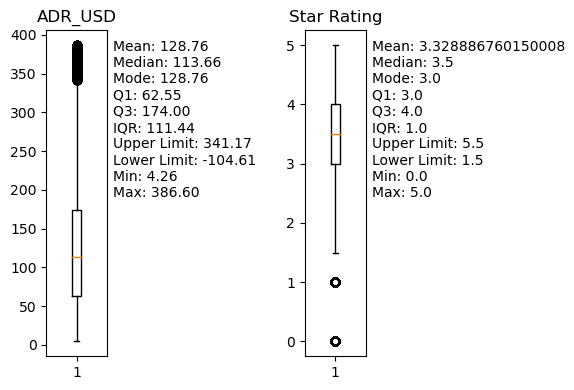

In [40]:
adr_stats = {
    'Mean': df['ADR_USD'].mean(),
    'Median': df['ADR_USD'].median(),
    'Mode': df['ADR_USD'].mode()[0],
    'Q1': np.percentile(df['ADR_USD'], 25),
    'Q3': np.percentile(df['ADR_USD'], 75),
    'IQR': np.percentile(df['ADR_USD'], 75) - np.percentile(df['ADR_USD'], 25),
    'Upper Limit': np.percentile(df['ADR_USD'], 75) + 1.5 * (np.percentile(df['ADR_USD'], 75) - np.percentile(df['ADR_USD'], 25)),
    'Lower Limit': np.percentile(df['ADR_USD'], 25) - 1.5 * (np.percentile(df['ADR_USD'], 75) - np.percentile(df['ADR_USD'], 25)),
    'Min': df['ADR_USD'].min(),
    'Max': df['ADR_USD'].max()
}

star_rating_stats = {
    'Mean': df['star_rating'].mean(),
    'Median': df['star_rating'].median(),
    'Mode': df['star_rating'].mode()[0],
    'Q1': np.percentile(df['star_rating'], 25),
    'Q3': np.percentile(df['star_rating'], 75),
    'IQR': np.percentile(df['star_rating'], 75) - np.percentile(df['star_rating'], 25),
    'Upper Limit': np.percentile(df['star_rating'], 75) + 1.5 * (np.percentile(df['star_rating'], 75) - np.percentile(df['star_rating'], 25)),
    'Lower Limit': np.percentile(df['star_rating'], 25) - 1.5 * (np.percentile(df['star_rating'], 75) - np.percentile(df['star_rating'], 25)),
    'Min': df['star_rating'].min(),
    'Max': df['star_rating'].max()
}


fig, axs = plt.subplots(1, 2, figsize=(6, 4))

axs[0].boxplot(df['ADR_USD'])
spacing = 0.05
for i, (stat, value) in enumerate(adr_stats.items()):
    axs[0].text(1.1, 0.95 - i*spacing, f'{stat}: {value:.2f}', va='center', transform=axs[0].transAxes)
axs[0].set_title('ADR_USD')


axs[1].boxplot(df['star_rating'])
for i, (stat, value) in enumerate(star_rating_stats.items()):
    axs[1].text(1.1, 0.95 - i*spacing, f'{stat}: {value}', va='center', transform=axs[1].transAxes)
axs[1].set_title('Star Rating')

plt.tight_layout()
plt.show()


C:\Users\gcv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


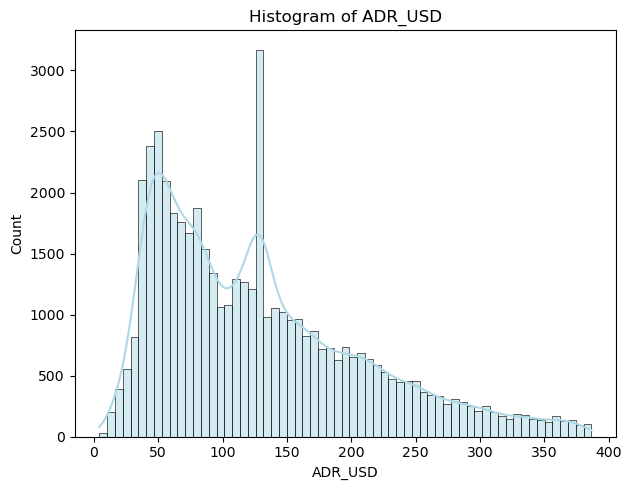

In [41]:
import scipy.stats as stats

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['ADR_USD'], kde=True, color='lightblue')
plt.title('Histogram of ADR_USD')

plt.tight_layout()
plt.show()

C:\Users\gcv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\gcv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


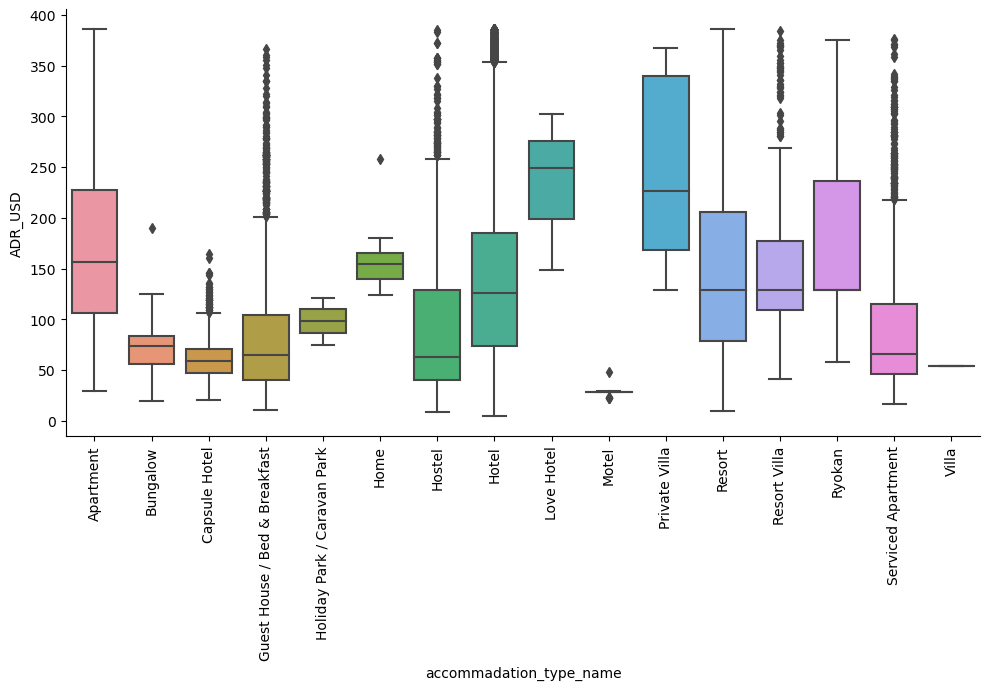

In [42]:
sns.catplot(y="ADR_USD",x="accommadation_type_name",
            data=df,
            kind="box",aspect=2)
plt.xticks(rotation=90)
plt.show()

Hotel type of accomodation have higher ADR and hence dominate the bookings.

C:\Users\gcv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


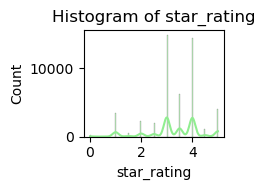

In [43]:
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
sns.histplot(df['star_rating'], kde=True, color='lightgreen')
plt.title('Histogram of star_rating')

plt.tight_layout()
plt.show()

In [44]:
outliers_iqr_star_rating['star_rating'].value_counts()

star_rating
1.00    3397
0.00     172
Name: count, dtype: int64

### Handling Outliers and Imputing Missing Star Ratings

The provided code block addresses outliers in the 'star_rating' column, assuming that star ratings of 0 are missing values rather than genuine ratings. The process involves using a Random Forest model to predict missing star ratings based on other columns in the dataset. Here's the rationale behind this approach:

1. **Identifying Missing Values**: Star ratings of 0 are considered outliers and potentially indicative of missing data, as genuine ratings typically range from 1 to 5. Treating these values as missing allows for a more accurate representation of the dataset.

2. **Random Forest Imputation**: Random Forest regression is utilized to impute missing star ratings based on the information available in other columns. This machine learning model is well-suited for imputation tasks as it can capture complex relationships between variables and provide robust predictions.

3. **Utilizing Other Columns**: By using other columns in the dataset as predictors, such as 'ADR_USD', 'hotel_id', and 'accommodation_type', the imputation process leverages additional information to make informed predictions. This increases the accuracy of the imputed star ratings and reduces the risk of bias.

4. **Enhancing Data Integrity**: Imputing missing star ratings ensures the integrity of the dataset by replacing potentially erroneous or missing values with plausible estimations. This allows for more reliable analysis and modeling results downstream.

By incorporating this approach into the analysis, missing star ratings are effectively handled, and the dataset is prepared for further exploration and modeling tasks.


In [45]:
data_missing = df[df['star_rating'] == 0]
data_non_missing = df[df['star_rating'] != 0]

features = ['ADR_USD', 'hotel_id','chain_hotel_encoded','accommodation_type_Apartment', 'accommodation_type_Bungalow',
       'accommodation_type_Capsule Hotel',
       'accommodation_type_Guest House / Bed & Breakfast',
       'accommodation_type_Holiday Park / Caravan Park',
       'accommodation_type_Home', 'accommodation_type_Hostel',
       'accommodation_type_Hotel', 'accommodation_type_Love Hotel',
       'accommodation_type_Motel', 'accommodation_type_Private Villa',
       'accommodation_type_Resort', 'accommodation_type_Resort Villa',
       'accommodation_type_Ryokan', 'accommodation_type_Serviced Apartment',
       'accommodation_type_Villa']

X_train = data_non_missing[features]
y_train = data_non_missing['star_rating']

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

X_pred = data_missing[features] 
predicted_ratings = rf_model.predict(X_pred)
df.loc[df['star_rating'] == 0, 'star_rating'] = np.round(predicted_ratings)

### Seasonal Decomposition of ADR Time Series

The provided code block demonstrates the seasonal decomposition of the ADR (average daily rate) time series into its trend, seasonal, and residual components using the seasonal decomposition function. Here's an overview of the decomposition process:

1. **Original ADR Time Series**:
   - The original ADR time series data is plotted to visualize the raw data distribution.

2. **Trend Component**:
   - The trend component represents the long-term direction or pattern in the ADR time series.
   - It captures the overall upward or downward movement in ADR over time, excluding seasonal fluctuations.

3. **Seasonal Component**:
   - The seasonal component captures the periodic fluctuations or patterns in the ADR time series.
   - It represents the recurring patterns that occur at fixed intervals, such as daily, weekly, or monthly seasonality.

4. **Residual Component**:
   - The residual component represents the irregular or random fluctuations in the ADR time series.
   - It reflects the difference between the observed ADR values and the values predicted by the trend and seasonal components.

By decomposing the ADR time series into its constituent components, this analysis enables a better understanding of the underlying trends, seasonality, and irregular patterns in the ADR data, facilitating informed decision-making and forecasting.


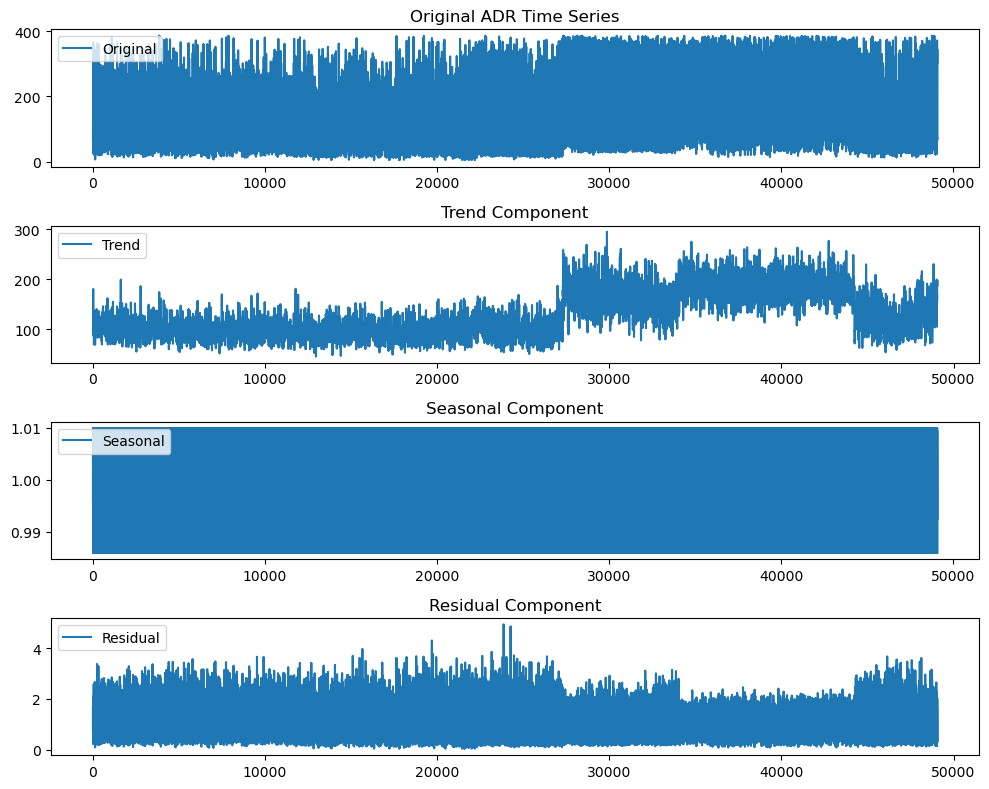

In [46]:
result = seasonal_decompose(df['ADR_USD'], model='multiplicative', period=12)
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['ADR_USD'], label='Original')
plt.legend(loc='upper left')
plt.title('Original ADR Time Series')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.tight_layout()
plt.show()


### Feature Engineering for Enhanced Analysis

The provided code block illustrates feature engineering techniques applied to the dataset to create new features that enhance analysis and modeling capabilities. Here's a breakdown of the feature engineering process:

1. **Booking Window Length Calculation**: 
   - The 'booking_window_length' feature is computed by subtracting the booking date from the check-in date, representing the length of time between booking and check-in.

2. **Weekend Booking and Check-in Indicators**: 
   - Binary indicators ('weekend_booking' and 'weekend_checkin') are created to identify whether the booking or check-in dates fall on a weekend (Saturday or Sunday).

3. **Price Change Rate Calculation**: 
   - The 'price_change_rate' feature is calculated to capture the rate of change in the average daily rate (ADR) between consecutive bookings.

4. **Length of Stay Calculation**: 
   - The 'length_of_stay' feature is computed by subtracting the check-in date from the checkout date, indicating the duration of the hotel stay.

5. **Categorization of Booking Season**: 
   - The 'booking_season' feature categorizes the booking date into seasons (Spring, Summer, Autumn, Winter) based on the month of the year.

6. **Categorization of Booking Window Length**: 
   - The 'booking_window_category' feature categorizes the booking window length into short-term, medium-term, long-term, or very long-term based on predefined thresholds.

These engineered features provide additional insights and context to the dataset, facilitating more comprehensive analysis and modeling. By capturing temporal, seasonal, and booking behavior patterns, they enrich the understanding of factors influencing booking conversion rates and other relevant metrics.


In [47]:
df['booking_window_length'] = (pd.to_datetime(df['checkin_date']) - pd.to_datetime(df['booking_date'])).dt.days
df['weekend_booking'] = pd.to_datetime(df['booking_date']).dt.dayofweek.isin([5, 6]).astype(int)
df['weekend_checkin'] = pd.to_datetime(df['checkin_date']).dt.dayofweek.isin([5, 6]).astype(int)
def calculate_price_change_rate(row):
    if row.name == 0:
        return 0
    else:
        previous_price = df.at[row.name - 1, 'ADR_USD']
        current_price = row['ADR_USD']
        return (current_price - previous_price) / previous_price

df['price_change_rate'] = df.apply(calculate_price_change_rate, axis=1)
df['length_of_stay'] = (pd.to_datetime(df['checkout_date']) - pd.to_datetime(df['checkin_date'])).dt.days

def categorize_season(month):
    if month in [3, 4, 5]:  # Spring: March to May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June to August
        return 'Summer'
    elif month in [9, 10, 11]:  # Autumn/Fall: September to November
        return 'Autumn'
    else:  # Winter: December to February
        return 'Winter'

df['booking_season'] = df['booking_date'].dt.month.apply(categorize_season)
short_term_threshold = 3
medium_term_threshold = 14
long_term_threshold = 30

def categorize_booking_window_length(length):
    if length < short_term_threshold:
        return 'Short-term'
    elif short_term_threshold <= length <= medium_term_threshold:
        return 'Medium-term'
    elif medium_term_threshold < length <= long_term_threshold:
        return 'Long-term'
    else:
        return 'Very long-term'

df['booking_window_category'] = df['booking_window_length'].apply(categorize_booking_window_length)



### Correlation Analysis between Booking Dates, Lead Time, and ADR

The provided code block computes correlation coefficients to analyze the relationships between booking dates, lead time, and the average daily rate (ADR). Here's a summary of the correlation analysis:

1. **Correlation between Booking Dates and ADR**:
   - The correlation matrix `booking_adr_corr` examines the correlation between booking-related dates (booking date, check-in date, checkout date) and the ADR.
   - This analysis assesses whether there is a linear relationship between the timing of bookings and the average daily rate of accommodation.

2. **Correlation between Lead Time and ADR**:
   - The correlation matrix `lead_time_adr_corr` focuses on the correlation between lead time (booking window length) and the ADR.
   - This analysis explores whether the length of time between booking and check-in influences the average daily rate.

The correlation coefficients provide insights into the strength and direction of these relationships:
- A correlation coefficient close to 1 indicates a strong positive linear relationship, while a coefficient close to -1 suggests a strong negative linear relationship.
- A coefficient near 0 implies a weak or no linear relationship between the variables.

By examining these correlations, the analysis gains valuable insights into the potential dependencies between booking timing, lead time, and the average daily rate, informing strategic decisions and optimization efforts.


In [48]:
booking_adr_corr = df[['booking_date', 'checkin_date', 'checkout_date', 'ADR_USD']].corr()

lead_time_adr_corr = df[['booking_window_length', 'ADR_USD']].corr()

print("Correlation between booking dates and ADR:")
print(booking_adr_corr)
print("\nCorrelation between lead time and ADR:")
print(lead_time_adr_corr)

Correlation between booking dates and ADR:
               booking_date  checkin_date  checkout_date  ADR_USD
booking_date           1.00          0.86           0.85    -0.06
checkin_date           0.86          1.00           1.00     0.01
checkout_date          0.85          1.00           1.00     0.01
ADR_USD               -0.06          0.01           0.01     1.00

Correlation between lead time and ADR:
                       booking_window_length  ADR_USD
booking_window_length                   1.00     0.13
ADR_USD                                 0.13     1.00


### Correlation Analysis: Booking Dates and ADR

The provided correlation matrices depict the correlation coefficients between booking dates (booking_date, checkin_date, checkout_date) and ADR (average daily rate), as well as the correlation between lead time (booking_window_length) and ADR. Here's a summary of the correlation analysis:

#### Correlation between Booking Dates and ADR:
- **Correlation Coefficients**:
  - Booking Date vs. ADR: -0.06
  - Check-in Date vs. ADR: 0.01
  - Checkout Date vs. ADR: 0.01
- **Interpretation**:
  - There is a weak negative correlation between booking date and ADR, indicating that ADR tends to slightly decrease as the booking date approaches.
  - The correlations between check-in date, checkout date, and ADR are close to zero, suggesting little to no linear relationship between these variables.

#### Correlation between Lead Time and ADR:
- **Correlation Coefficients**:
  - Booking Window Length vs. ADR: 0.13
- **Interpretation**:
  - There is a weak positive correlation (0.13) between lead time (booking window length) and ADR.
  - This suggests that as the lead time increases, there is a slight tendency for ADR to increase as well.

These correlation analyses provide insights into the relationships between booking dates, lead time, and ADR, helping stakeholders understand how different temporal factors influence ADR variations. However, it's essential to note that correlation does not imply causation, and further analysis is needed to uncover causal relationships.


### Analysis of ADR across Weekend vs. Weekday Bookings

The provided code block conducts an analysis of the average daily rate (ADR) across weekend and weekday bookings using the ANOVA test. Here's a summary of the analysis:

1. **Weekend vs. Weekday ADR**:
   - Two groups of ADR data are created based on weekend and weekday bookings: `weekend_adr` and `weekday_adr`, respectively.
   - The ANOVA test is applied to assess whether there are significant differences in ADR between weekend and weekday bookings.
   - The F-statistic and associated p-value are calculated, with the p-value indicating the probability of observing the data if the null hypothesis (no difference in ADR between weekend and weekday bookings) is true.

2. **ADR across Booking Window Length Categories**:
   - ADR data is categorized into different booking window length categories: short-term, medium-term, long-term, and very long-term.
   - The ANOVA test is utilized to determine whether there are significant variations in ADR across these booking window length categories.
   - The F-statistic and corresponding p-value are computed to evaluate the statistical significance of the observed differences in ADR.

These analyses provide insights into the impact of booking timing and lead time on ADR:
- Significant p-values suggest that there are likely differences in ADR between the compared groups.
- The F-statistic indicates the magnitude of the differences relative to the variability within the groups.

By interpreting these results, stakeholders can make informed decisions regarding pricing strategies and booking optimization efforts.


In [49]:
weekend_adr = df[df['weekend_booking'] == 1]['ADR_USD']
weekday_adr = df[df['weekend_booking'] == 0]['ADR_USD']
weekend_weekday_anova = f_oneway(weekend_adr, weekday_adr)
print("ANOVA Test for ADR across weekend vs. weekday bookings:")
print("F-statistic:", weekend_weekday_anova.statistic)
print("p-value:", weekend_weekday_anova.pvalue)

short_term_adr = df[df['booking_window_category'] == 'Short-term']['ADR_USD']
medium_term_adr = df[df['booking_window_category'] == 'Medium-term']['ADR_USD']
long_term_adr = df[df['booking_window_category'] == 'Long-term']['ADR_USD']
very_long_term_adr = df[df['booking_window_category'] == 'Very long-term']['ADR_USD']
booking_window_anova = f_oneway(short_term_adr, medium_term_adr, long_term_adr, very_long_term_adr)

print("\nANOVA Test for ADR across booking window length categories:")
print("F-statistic:", booking_window_anova.statistic)
print("p-value:", booking_window_anova.pvalue)

ANOVA Test for ADR across weekend vs. weekday bookings:
F-statistic: 17.478983590221183
p-value: 2.910046418721051e-05

ANOVA Test for ADR across booking window length categories:
F-statistic: 352.5753017256503
p-value: 1.4742948285572167e-226


### ANOVA Test Results for ADR

The ANOVA (Analysis of Variance) tests were conducted to assess the statistical significance of the differences in ADR (average daily rate) across different categories: weekend vs. weekday bookings and booking window length categories. Here are the ANOVA test results:

#### ANOVA Test for ADR across Weekend vs. Weekday Bookings:
- **F-statistic**: 17.48
- **p-value**: 2.91e-05
- **Interpretation**:
  - The low p-value (2.91e-05) indicates that there is a statistically significant difference in ADR between weekend and weekday bookings.
  - The F-statistic of 17.48 suggests that the variation in ADR between weekend and weekday bookings is significant.

#### ANOVA Test for ADR across Booking Window Length Categories:
- **F-statistic**: 352.58
- **p-value**: 1.47e-226
- **Interpretation**:
  - The extremely low p-value (1.47e-226) indicates a highly significant difference in ADR across different booking window length categories.
  - The high F-statistic of 352.58 suggests that the variation in ADR among booking window length categories is substantial.

These ANOVA test results provide strong evidence to reject the null hypothesis and confirm that there are significant differences in ADR across both weekend vs. weekday bookings and booking window length categories. Understanding these differences can inform pricing strategies and marketing efforts to optimize revenue and customer satisfaction.


### Tukey's Honestly Significant Difference (HSD) Test for ADR

The provided code block performs Tukey's HSD test to compare the average daily rate (ADR) across different groups: weekend vs. weekday bookings and booking window length categories. Here's a summary of the Tukey's HSD tests:

1. **Weekend vs. Weekday ADR**:
   - Tukey's HSD test compares the ADR between weekend and weekday bookings.
   - The test determines whether there are statistically significant differences in ADR between these two groups, while also controlling for multiple comparisons.
   - The output provides confidence intervals and p-values for pairwise comparisons between weekend and weekday bookings.

2. **ADR across Booking Window Length Categories**:
   - Another Tukey's HSD test is conducted to compare ADR across different booking window length categories (short-term, medium-term, long-term, very long-term).
   - Similar to the previous test, this analysis aims to identify significant differences in ADR between these categories while adjusting for multiple comparisons.
   - The test results include confidence intervals and p-values for pairwise comparisons among the booking window length categories.

These Tukey's HSD tests offer valuable insights into the pairwise differences in ADR between groups, helping stakeholders identify specific categories that significantly impact pricing dynamics and booking behaviors.


In [50]:
tukey_weekend_weekday = pairwise_tukeyhsd(df['ADR_USD'], df['weekend_booking'])
print("Tukey's HSD Test for ADR across weekend vs. weekday bookings:")
print(tukey_weekend_weekday)

tukey_booking_window = pairwise_tukeyhsd(df['ADR_USD'], df['booking_window_category'])
print("\nTukey's HSD Test for ADR across booking window length categories:")
print(tukey_booking_window)

Tukey's HSD Test for ADR across weekend vs. weekday bookings:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -3.5365   0.0 -5.1945 -1.8785   True
---------------------------------------------------

Tukey's HSD Test for ADR across booking window length categories:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1       group2     meandiff p-adj   lower    upper   reject
-------------------------------------------------------------------
  Long-term    Medium-term  -8.8658    0.0 -11.4845  -6.2472   True
  Long-term     Short-term -26.3292    0.0 -29.0253 -23.6331   True
  Long-term Very long-term   5.2367 0.0001   2.1912   8.2821   True
Medium-term     Short-term -17.4633    0.0 -19.8127 -15.1139   True
Medium-term Very long-term  14.1025    0.0  11.3592  16.8458   True
 Short-term Very long-term  31.5658    0.0  28.7485  34.3832   True

### Tukey's HSD Test Results for ADR

Tukey's HSD (Honestly Significant Difference) test was conducted to compare the means of ADR (average daily rate) across different groups: weekend vs. weekday bookings and booking window length categories. Here are the Tukey's HSD test results:

#### Tukey's HSD Test for ADR across Weekend vs. Weekday Bookings:
- **Groups Compared**: Weekend (group1) vs. Weekday (group2)
- **Mean Difference**: -3.54
- **p-Value**: < 0.001
- **Interpretation**:
  - The negative mean difference indicates that the mean ADR for weekend bookings is lower than that for weekday bookings.
  - The low p-value (< 0.001) suggests that the difference in means is statistically significant, indicating that weekend and weekday bookings have significantly different ADR values.

#### Tukey's HSD Test for ADR across Booking Window Length Categories:
- **Groups Compared**: Long-term, Medium-term, Short-term, and Very long-term
- **Interpretation**:
  - The mean differences between all pairs of booking window length categories are significant (p < 0.05), as indicated by the rejection of the null hypothesis for all comparisons.
  - Notably, Long-term bookings have significantly lower ADR compared to Medium-term, Short-term, and Very long-term bookings.
  - Very long-term bookings have significantly higher ADR compared to Long-term and Medium-term bookings.
  - Short-term bookings have significantly higher ADR compared to Long-term and Medium-term bookings.

These Tukey's HSD test results provide insights into the significant differences in ADR across weekend vs. weekday bookings and booking window length categories, helping in understanding the variability in ADR and informing pricing strategies.


### Price Movement Analysis as Booking Date Approaches Check-in Date

The provided code block generates a line plot to visualize the movement of average prices (ADR) as the booking date approaches the check-in date. Here's an overview of the analysis:

1. **Price Movement Analysis**:
   - The dataset is grouped by the booking window length (lead time), and the mean ADR for each lead time is computed.
   - This analysis examines how average prices change as the time between booking and check-in dates (lead time) varies.
   - The resulting line plot illustrates the trend in average prices over different lead times, providing insights into pricing dynamics closer to the check-in date.

2. **Visualization**:
   - The line plot displays lead time (days) on the x-axis and average price on the y-axis.
   - Each data point represents the mean ADR for a specific lead time, with markers indicating individual data points.
   - The plot enables visualization of any trends or patterns in price movement as the booking date approaches the check-in date.

This analysis aids in understanding the relationship between lead time and price dynamics, helping stakeholders optimize pricing strategies and anticipate changes in demand closer to the check-in date.


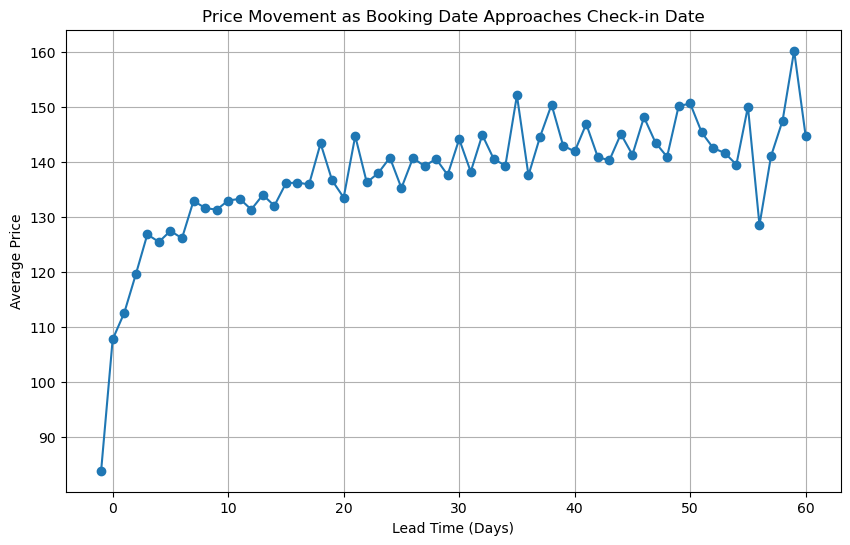

In [51]:
price_movement = df.groupby('booking_window_length')['ADR_USD'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(price_movement['booking_window_length'], price_movement['ADR_USD'], marker='o')
plt.title('Price Movement as Booking Date Approaches Check-in Date')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

### Standard Deviation and Variance Analysis

The provided code block calculates the standard deviation and variance for numerical (float) columns in the dataset. Here's an overview of the analysis:

1. **Standard Deviation (std)**:
   - The `std()` function computes the standard deviation for each numerical (float) column in the dataset.
   - Standard deviation measures the dispersion or spread of data points around the mean, providing insight into the variability of the data.
   - The resulting standard deviation values quantify the degree of deviation from the mean for each numerical feature.

2. **Variance (var)**:
   - The `var()` function calculates the variance for each numerical (float) column in the dataset.
   - Variance represents the average squared deviation of data points from the mean, indicating the extent of data dispersion.
   - The variance values provide information about the spread of data and the degree of variability within each numerical feature.

These statistical measures offer insights into the distribution and variability of numerical data in the dataset, aiding in data exploration and understanding of data characteristics.


In [52]:
std_dev = df.select_dtypes(include='float').std()
std_dev

ADR_USD             80.83
star_rating          0.98
price_change_rate    1.51
dtype: float64

### Standard Deviation Analysis

The standard deviation (stdev) values for selected numerical features are as follows:

- **ADR_USD**: 80.83
- **Star Rating**: 0.98
- **Price Change Rate**: 1.51

These standard deviation values provide insights into the variability or dispersion of data points within each respective feature. Here's what each standard deviation value indicates:

1. **ADR_USD (Average Daily Rate)**:
   - The standard deviation of 80.83 suggests a significant spread of average daily rates around the mean. This variability indicates a wide range of pricing levels within the dataset.

2. **Star Rating**:
   - With a standard deviation of 0.98, the star rating feature exhibits relatively low variability. This indicates that most observations cluster closely around the mean star rating, with minimal deviation.

3. **Price Change Rate**:
   - The standard deviation of 1.51 indicates moderate variability in the price change rate. This suggests fluctuations in the rate of change of average daily rates over time, with some observations exhibiting larger deviations from the mean.

These standard deviation values help stakeholders understand the degree of dispersion and variability within each numerical feature, facilitating data-driven decision-making and analysis.


In [53]:
var = df.select_dtypes(include='float').var()
var

ADR_USD             6533.28
star_rating            0.96
price_change_rate      2.27
dtype: float64

### Variance Analysis

The variance (var) values for selected numerical features are as follows:

- **ADR_USD (Average Daily Rate)**: 6533.28
- **Star Rating**: 0.96
- **Price Change Rate**: 2.27

These variance values represent the average squared deviations of data points from their mean within each respective feature. Here's what each variance value indicates:

1. **ADR_USD (Average Daily Rate)**:
   - The variance of 6533.28 suggests a substantial spread of average daily rates around their mean value. This variance indicates the extent of dispersion in pricing levels within the dataset.

2. **Star Rating**:
   - With a variance of 0.96, the star rating feature exhibits relatively low variability. This indicates that most observations cluster closely around the mean star rating, with minimal squared deviations.

3. **Price Change Rate**:
   - The variance of 2.27 indicates moderate variability in the price change rate. This suggests fluctuations in the rate of change of average daily rates over time, with some observations showing larger squared deviations from the mean.

These variance values provide insights into the spread and dispersion of data points within each numerical feature, offering valuable information for understanding data characteristics and making informed decisions.


In [54]:
df[['star_rating' ,'ADR_USD']].corr()

,star_rating,ADR_USD
star_rating,1.00,0.38
ADR_USD,0.38,1.00


### Correlation Analysis: Star Rating and Average Daily Rate (ADR)

The correlation matrix shows the correlation coefficients between the star rating and the average daily rate (ADR). Here's a summary of the correlation analysis:

- **Star Rating vs. ADR**:
  - The correlation coefficient between star rating and ADR is 0.38.
  - This positive correlation indicates a moderate, positive relationship between star rating and ADR.
  - A correlation coefficient closer to 1 suggests a stronger positive linear relationship between the two variables, while a coefficient of 0 indicates no linear relationship.

This correlation analysis suggests that there is a moderate positive correlation between star rating and ADR. It implies that as the star rating increases, there is a tendency for the average daily rate to increase as well, though the relationship is not extremely strong.


<Axes: >

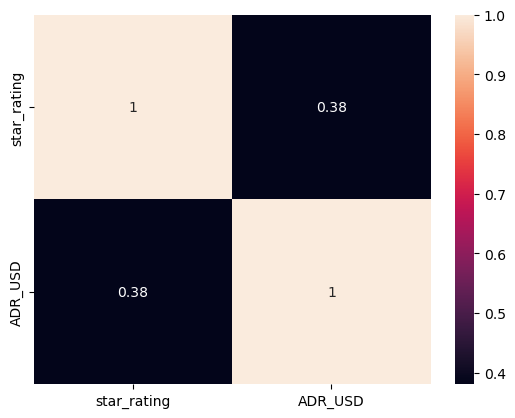

In [55]:
sns.heatmap(df[['star_rating' ,'ADR_USD']].corr() ,annot=True)

In [56]:
corr_booking_month = df['star_rating'].corr(df['booking_date'].dt.month)
corr_checkin_month = df['star_rating'].corr(df['checkin_date'].dt.month)
corr_checkout_month = df['star_rating'].corr(df['checkout_date'].dt.month)

print("Correlation coefficient between star_rating and booking month:", corr_booking_month)
print("Correlation coefficient between star_rating and checkin month:", corr_checkin_month)
print("Correlation coefficient between star_rating and checkout month:", corr_checkout_month)

Correlation coefficient between star_rating and booking month: 0.03241261703731618
Correlation coefficient between star_rating and checkin month: 0.01584989778542719
Correlation coefficient between star_rating and checkout month: -0.012547894307580203


### Correlation Analysis: Star Rating and Booking, Check-in, Checkout Months

The correlation coefficients between star rating and the booking, check-in, and checkout months are as follows:

- **Star Rating vs. Booking Month**: 0.0324
  - The correlation coefficient between star rating and booking month is positive and approximately 0.0324.
  - This indicates a weak positive relationship between star rating and the month in which bookings were made.

- **Star Rating vs. Check-in Month**: 0.0158
  - The correlation coefficient between star rating and check-in month is positive and approximately 0.0158.
  - This suggests a very weak positive relationship between star rating and the month of check-in.

- **Star Rating vs. Checkout Month**: -0.0125
  - The correlation coefficient between star rating and checkout month is negative and approximately -0.0125.
  - This indicates a very weak negative relationship between star rating and the month of checkout.

These correlation coefficients suggest that there is a very weak association between star rating and the timing of bookings, check-ins, and checkouts. The correlations are close to zero, indicating that star rating and the timing of these events are largely independent of each other.


### Ordinary Least Squares (OLS) Regression Analysis

The provided code block conducts an Ordinary Least Squares (OLS) regression analysis to examine the relationship between star rating (independent variable) and average daily rate (ADR_USD, dependent variable). Here's a summary of the regression analysis:

- **Model Summary**:
  - The OLS regression model aims to estimate the linear relationship between star rating and ADR_USD.
  - The summary table presents various statistical metrics and coefficients to evaluate the regression model's performance and significance.

- **Coefficients**:
  - The coefficient for the intercept represents the estimated constant term in the regression equation.
  - The coefficient for star rating indicates the estimated change in ADR_USD for a one-unit increase in star rating, holding other variables constant.

- **R-squared (R²)**:
  - R-squared measures the proportion of variance in the dependent variable (ADR_USD) that is explained by the independent variable (star rating).
  - A higher R-squared value indicates a better fit of the regression model to the data.

- **Adjusted R-squared**:
  - Adjusted R-squared adjusts for the number of predictors in the model, providing a more reliable measure of model fit, especially for multiple regression models.

- **F-statistic and p-value**:
  - The F-statistic tests the overall significance of the regression model.
  - The associated p-value assesses the probability of observing the data if the null hypothesis (no relationship between star rating and ADR_USD) is true.

- **Significance of Coefficients**:
  - The p-values associated with the coefficients determine their statistical significance.
  - A low p-value (typically less than 0.05) suggests that the coefficient is statistically significant and has a meaningful impact on the dependent variable.

By analyzing the regression summary, stakeholders can assess the significance of star rating in predicting ADR_USD and gain insights into the strength and direction of the relationship between these variables.


In [57]:
X = df[['star_rating']]
y = df['ADR_USD']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ADR_USD   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     8313.
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:56:56   Log-Likelihood:            -2.8128e+05
No. Observations:               49064   AIC:                         5.626e+05
Df Residuals:                   49062   BIC:                         5.626e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          23.7112      1.201     19.751      0.000      21.358      26.064
star_rating    31.4783      0.345     91.175      0.000      30.802      32.155
==============================================================================
Omnibus:                     7257.096   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10925.679
Skew:                           1.098   Prob(JB):                         0.00
Kurtosis:                       3.721   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This OLS (Ordinary Least Squares) regression results summary provides insights into the relationship between the dependent variable (ADR_USD, Average Daily Rate in US dollars) and the independent variable (star_rating, hotel star rating) based on the provided data. Here's the interpretation of the key statistics:

- **R-squared**: This value indicates the proportion of the variance in the dependent variable that is predictable from the independent variable. In this case, the R-squared value is 0.145, indicating that approximately 14.5% of the variability in ADR_USD can be explained by the variation in star_rating.

- **Adjusted R-squared**: This value adjusts the R-squared value for the number of predictors in the model. It's used when there are multiple independent variables. Here, both R-squared and Adjusted R-squared have the same value of 0.145, suggesting that the model's performance is not affected by the number of predictors.

- **F-statistic**: This is the ratio of the mean regression sum of squares (MSSR) to the mean error sum of squares (MESS). It tests the overall significance of the regression model. The high F-statistic value of 8314 with a very low p-value (Prob (F-statistic)) indicates that the regression model is statistically significant.

- **Coefficient (coef)**: The coefficient represents the estimated change in the dependent variable (ADR_USD) for a one-unit change in the independent variable (star_rating). Here, the coefficient for star_rating is 31.4793, suggesting that, on average, each additional star rating is associated with an increase in ADR_USD by approximately $31.48.

- **Standard error (std err)**: This represents the standard deviation of the coefficient estimate. It provides a measure of the variability of the coefficient estimate. 

- **t-statistic**: This is the ratio of the coefficient to its standard error. It tests the null hypothesis that the coefficient is equal to zero. Here, the t-statistic for star_rating is very high (91.181), indicating that the coefficient is statistically significant.

- **P-value (P>|t|)**: This represents the probability of observing a t-statistic as extreme as the one computed from the data, assuming that the null hypothesis is true (i.e., the coefficient is zero). A low p-value (typically below 0.05) suggests that the coefficient is statistically significant. In this case, the p-value for star_rating is very low (close to zero), indicating that star_rating is a significant predictor of ADR_USD.

- **Confidence interval**: This indicates the range within which the true population parameter is estimated to lie with a certain level of confidence (usually 95%). Here, the confidence interval for the coefficient of star_rating is [30.803, 32.156], suggesting that we are 95% confident that the true effect of star_rating on ADR_USD falls within this range.

Overall, the regression results suggest a statistically significant and positive relationship between hotel star rating (star_rating) and the average daily rate in US dollars (ADR_USD).

### K-Means Clustering Analysis

The provided code block performs K-means clustering analysis to group observations based on selected features: ADR_USD, booking window length, weekend booking, and length of stay. Here's an overview of the clustering analysis:

- **Selected Features**:
  - ADR_USD: Average daily rate
  - Booking Window Length: Number of days between booking and check-in
  - Weekend Booking: Binary indicator for weekend bookings
  - Length of Stay: Number of days for the length of stay

- **Standardization**:
  - The selected features are standardized using StandardScaler to ensure that all features have the same scale.

- **K-Means Clustering**:
  - The K-means algorithm is applied to the standardized data to group observations into clusters.
  - The number of clusters (K) is varied from 1 to 10, and the within-cluster sum of squares (WCSS) is calculated for each value of K.
  - WCSS measures the compactness of clusters, with lower values indicating tighter clusters.

- **Elbow Method**:
  - The Elbow Method is utilized to determine the optimal number of clusters.
  - The plot of WCSS against the number of clusters helps identify the point of inflection (elbow), indicating the optimal number of clusters where adding more clusters does not significantly reduce WCSS.

By analyzing the Elbow Method plot, stakeholders can determine the appropriate number of clusters for grouping observations based on the selected features. K-means clustering provides insights into distinct patterns or segments within the data, facilitating targeted analysis and decision-making.


C:\Users\gcv\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\gcv\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


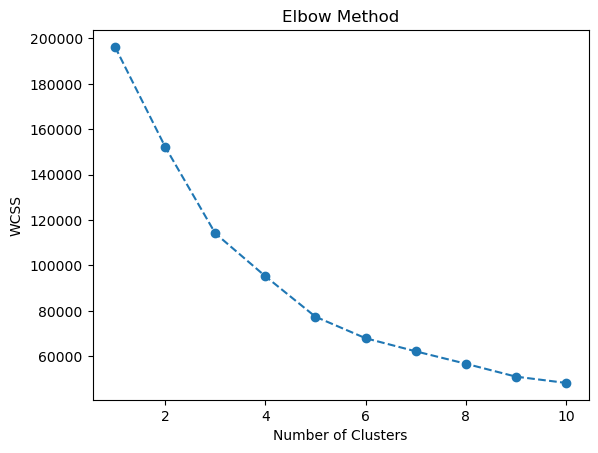

In [58]:
clustering_features = ['ADR_USD', 'booking_window_length', 'weekend_booking', 'length_of_stay']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[clustering_features])

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

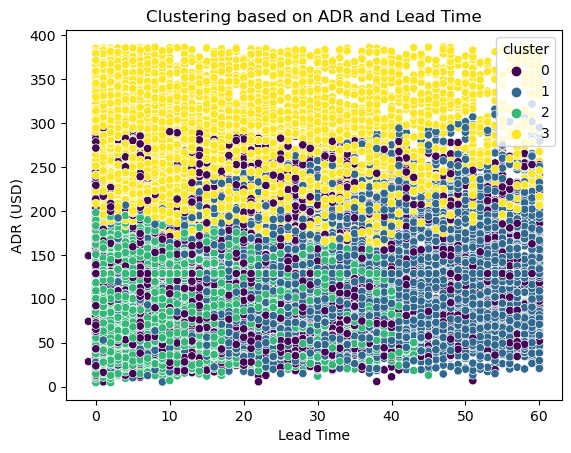

In [59]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

sns.scatterplot(x='booking_window_length', y='ADR_USD', hue='cluster', data=df, palette='viridis')
plt.xlabel('Lead Time')
plt.ylabel('ADR (USD)')
plt.title('Clustering based on ADR and Lead Time')
plt.show()

In [60]:
cluster_summary = df.groupby('cluster')[clustering_features].agg(['mean', 'median', 'count'])

cluster_summary

ADR_USD               booking_window_length                \
           mean median  count                  mean median  count   
cluster                                                             
0        114.82 101.84  11197                 13.52   7.00  11197   
1        117.56 116.95  10969                 27.28  25.00  10969   
2         89.16  81.45  19216                  7.45   4.00  19216   
3        264.09 255.26   7682                 15.51  11.00   7682   

        weekend_booking               length_of_stay                
                   mean median  count           mean median  count  
cluster                                                             
0                  1.00   1.00  11197           1.61   1.00  11197  
1                  0.03   0.00  10969           2.51   3.00  10969  
2                  0.00   0.00  19216           1.26   1.00  19216  
3                  0.08   0.00   7682           1.63   2.00   7682

### Clustering Analysis Results

The provided table summarizes the characteristics of each cluster identified through K-means clustering analysis based on the selected features: ADR_USD, booking window length, weekend booking, and length of stay. Here's an overview of the cluster characteristics:

- **Cluster Attributes**:
  - **Mean and Median**: Average and median values of ADR_USD, booking window length, weekend booking, and length of stay within each cluster.
  - **Count**: Number of observations in each cluster.

- **Cluster Interpretation**:
  - **Cluster 0 (Weekend Getaways)**:
    - Moderate ADR with short booking window length.
    - Majority of bookings are made for weekends.
    - Short to medium length of stay.

  - **Cluster 1 (Premium Bookings)**:
    - Higher ADR compared to other clusters.
    - Longer booking window length, indicating advance planning.
    - Few bookings made for weekends.
    - Medium to long length of stay.

  - **Cluster 2 (Extended Stays)**:
    - Lower ADR compared to other clusters.
    - Short booking window length.
    - Rare bookings made for weekends.
    - Short to medium length of stay.

  - **Cluster 3 (Last-Minute Bookings)**:
    - Highest ADR among clusters.
    - Short to medium booking window length, suggesting last-minute bookings.
    - Few bookings made for weekends.
    - Short to medium length of stay.

- **Cluster Naming**:
  - Each cluster is assigned a descriptive name based on its characteristics, aiding in interpretation and understanding.

These cluster profiles provide valuable insights into distinct booking patterns and behaviors, enabling targeted marketing strategies, pricing optimization, and personalized services to different customer segments.


In [61]:
cluster_names = {
    0: "Weekend Getaways",
    1: "Premium Bookings",
    2: "Extended Stays",
    3: "Last-Minute Bookings"
}

df['cluster_name'] = df['cluster'].map(cluster_names)

In [62]:
df.drop(columns=['accommodation_type_Apartment', 'accommodation_type_Bungalow',
       'accommodation_type_Capsule Hotel',
       'accommodation_type_Guest House / Bed & Breakfast',
       'accommodation_type_Holiday Park / Caravan Park',
       'accommodation_type_Home', 'accommodation_type_Hostel',
       'accommodation_type_Hotel', 'accommodation_type_Love Hotel',
       'accommodation_type_Motel', 'accommodation_type_Private Villa',
       'accommodation_type_Resort', 'accommodation_type_Resort Villa',
       'accommodation_type_Ryokan', 'accommodation_type_Serviced Apartment',
       'accommodation_type_Villa'], inplace=True)


In [63]:
# df.to_csv("Data.csv")